In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import monad
import scipy.stats
import nve_basic
reload(monad)

Input parameters
Number of particles 256
Initial temperature 1.00000000e+00
Box size 5.30000000e+00
epsilon 1.00000000e+00
sigma 1.00000000e+00
dt 5.00000000e-03
Total time 1.00000000e+02
Number of steps 20000


<module 'monad' from 'monad.pyc'>

Numpy vectorization approach adapted from https://www.labri.fr/perso/nrougier/from-python-to-numpy/#boids

### Begin with a 2D LJ simulation

This will be a 2-dimensional simulation of Lennard-Jones particles using all dimensionless parameters:
* Time step $t = 1$
* Particle mass $m = 1$
* Temperature $T = 1$
* LJ potential width $\sigma=1$
* LJ potential depth $\epsilon=1$

In [4]:
# Define simulation settings
n = 16
L = 10.  # Simulation box size
sigma = 1.
epsilon = 1.
rcut = 20.
nlog = 10 # Log to trajectory every dtlog time steps
dt = .5

In [5]:
pos = monad.initialize_positions(n, L)

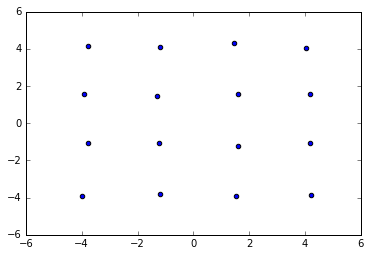

In [6]:
# Visualize uniform initial positions in simulation box
plt.scatter(pos[:,0], pos[:,1])

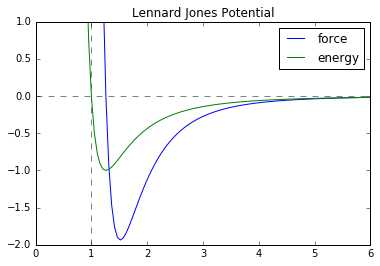

In [7]:
x = np.linspace(.9, 6, 100)
force = monad.lj(x, 1, 1)[0]
energy = monad.lj(x, 1, 1)[1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, force, label='force')
ax.plot(x, energy, label='energy')
ax.hlines(0, 0, 6, color = 'gray', linestyle='--')
ax.vlines(1, -2, 1, color = 'gray', linestyle='--')
ax.set_title('Lennard Jones Potential')
ax.set_ylim(-2,1)
ax.legend()

In [36]:
%%time
# Initialize and run trajectory
nframes = int(1e4)
dt = .01
init_pos = monad.initialize_positions(n, L)
init_vel = monad.initialize_velocities(n)
ptraj, vtraj, etraj = monad.run(init_pos, init_vel, L, nframes=nframes, nlog=nlog, dt=dt)

CPU times: user 2.62 s, sys: 0 ns, total: 2.62 s
Wall time: 2.62 s


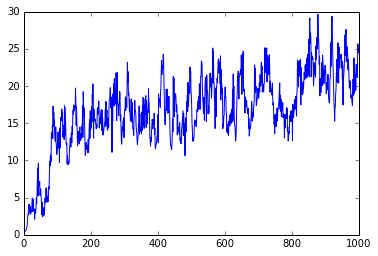

In [37]:
kinetic_energy = np.sum(vtraj**2, axis=(1,2))
plt.plot(kinetic_energy)

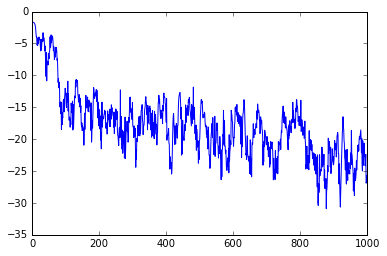

In [38]:
plt.plot(etraj)

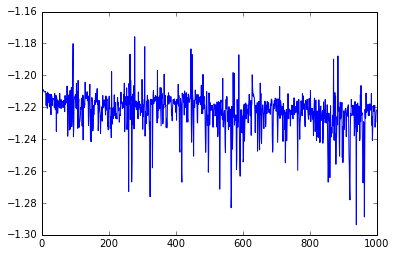

In [39]:
plt.plot(etraj + kinetic_energy)

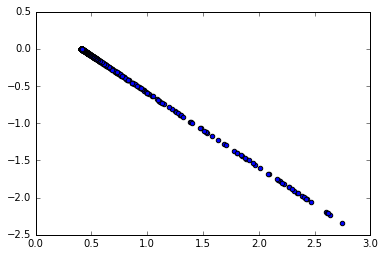

In [105]:
plt.scatter(kinetic_energy, etraj)

In [107]:
scipy.stats.linregress(kinetic_energy, etraj)

LinregressResult(slope=-1.0002336962562994, intercept=0.40914721689977374, rvalue=-0.99999983572162077, pvalue=0.0, stderr=1.8148530538575514e-05)

## Visualize the trajectory

In [129]:
%%bash 
rm f/lj/*.png

In [130]:
def write_frames(ptraj, start=0, stop=None, stride=1, dpi=100):
    if stop is None:
        stop = len(ptraj)
    for count, frameid in enumerate(range(start, stop, stride)):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(*ptraj[frameid].T)
        ax.set_xlim(-L/2, L/2)
        ax.set_ylim(-L/2, L/2)
        fig.savefig('f/lj/{}.png'.format(count), dpi=100, bbox_inches='tight')
        plt.close(fig)    

In [131]:
write_frames(ptraj, 0, None, 5, dpi=50)

In [134]:
%%bash
ffmpeg -framerate 15 -i f/lj/%d.png f/lj/out.mp4 -y  -loglevel error

<video controls src="f/lj/out.mp4" />

## Convergence testing on $\Delta t$

In [2]:
nve_basic.fcc_positions(200, 10)

array([[ 0.05,  0.05,  0.05],
       [ 0.05,  0.15,  0.15],
       [ 0.15,  0.15,  0.05],
       [ 0.15,  0.05,  0.15],
       [ 0.05,  0.05,  0.25],
       [ 0.05,  0.15,  0.35],
       [ 0.15,  0.15,  0.25],
       [ 0.15,  0.05,  0.35],
       [ 0.05,  0.05,  0.45],
       [ 0.05,  0.15,  0.55],
       [ 0.15,  0.15,  0.45],
       [ 0.15,  0.05,  0.55],
       [ 0.05,  0.05,  0.65],
       [ 0.05,  0.15,  0.75],
       [ 0.15,  0.15,  0.65],
       [ 0.15,  0.05,  0.75],
       [ 0.05,  0.25,  0.05],
       [ 0.05,  0.35,  0.15],
       [ 0.15,  0.35,  0.05],
       [ 0.15,  0.25,  0.15],
       [ 0.05,  0.25,  0.25],
       [ 0.05,  0.35,  0.35],
       [ 0.15,  0.35,  0.25],
       [ 0.15,  0.25,  0.35],
       [ 0.05,  0.25,  0.45],
       [ 0.05,  0.35,  0.55],
       [ 0.15,  0.35,  0.45],
       [ 0.15,  0.25,  0.55],
       [ 0.05,  0.25,  0.65],
       [ 0.05,  0.35,  0.75],
       [ 0.15,  0.35,  0.65],
       [ 0.15,  0.25,  0.75],
       [ 0.05,  0.45,  0.05],
       [ 0

## Calculate g(r)

In [ ]:
def g_of_r()

### Run another simulation with fewer particles and larger width ($\sigma$)

In [139]:
# Repeat with particles of larger width (sigma)
n = 16
L = 60.  # Simulation box size
sigma = 4
epsilon = 1.
rcut = 20.
dtlog = 10 # Log to trajectory every dtlog time steps
init_pos = monad.initialize_positions(n, L)
init_vel = monad.initialize_velocities(n, .1)
traj, vetraj, ketraj = monad.run(init_pos, init_vel, L, nframes=5000, dtlog=10, rcut=20, sigma=sigma, epsilon=epsilon)

In [140]:
%%bash 
rm f/biglj/*.png

In [141]:
for i in range(0,300):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(*traj[i].T)
    ax.set_xlim(-L/2, L/2)
    ax.set_ylim(-L/2, L/2)
    fig.savefig('f/biglj/{}.png'.format(i), dpi=100, bbox_inches='tight')
    plt.close(fig)

In [142]:
%%bash
ffmpeg -framerate 25 -i f/biglj/%d.png f/biglj/out.mp4 -y  -loglevel error

<video controls src="f/biglj/out.mp4" />